In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read tables from PDF
import tabula
import altair as alt

import plotly.graph_objects as go

## EDA for KCSC Financial Statements v7.1a (AL Only)

In [3]:
file = '../data/KCSC Financial Statements v7.1a (AL Only).pdf'

In [4]:
# Extract the tables from the PDF
tables = tabula.read_pdf(file, pages = 'all', multiple_tables = False, pandas_options={'header': 1})

In [5]:
# Convert all the PDFs into csv
tabula.convert_into_by_batch('../data/', output_format = "csv", pages = "all")

Got stderr: Jan 11, 2021 10:21:37 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode



In [6]:
# Use the first table and drop the rows and columns with only NAs
df = tables[0].set_index('Unnamed: 0').dropna(how='all').T.dropna(how='all')

In [7]:
# Drop the first two rows since they only contains the number of beds and monthly rent
df = df.iloc[2:, :]

In [8]:
# Only select the comlumns with names
df = df[df.columns[~df.columns.isna()]].dropna(axis=1, how='all')

In [9]:
# Clean the data, replace the symbols
cols = [True] * len(df.columns)
for i, col in enumerate(df.columns):
    df[col] = df[col].str.replace('$', '', regex=False)
    df[col] = df[col].str.replace(',', '', regex=False)
    df[col] = df[col].str.replace('-', '', regex=False)
    df[col] = df[col].str.replace('%', '', regex=False)

In [10]:
# Replace the spaces with NAs and drop the columns with only NAs
df = df.replace(r'^\s*$', np.nan, regex=True).dropna(axis=1, how='all')

In [11]:
# Convert the data type from str to float
for col in df.columns:
    df[col] = df[col].astype('float')

In [12]:
df

Unnamed: 0,Assisted Living - Funded,Funded Bed Rent,Total Gross Rent,Funded Bed Occupancy,Gross Rent Less Vacancy,Income from Ancillary Services,Total Income,Food and Consumables,"Payroll expenses (including taxes, benefits)",Business licensing,...,Traning/development,Management Fee,Amortization (building),Amortization (furniture + equipment),Utilities,Garbage/Snow removal,Total Operating Expenses,Net Operating Income,Less: Income taxes,After tax income
JAN,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
FEB,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
MAR,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
APR,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
MAY,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
JUN,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
JUL,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
AUG,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
SEP,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN
OCT,440000.0,440000.0,440000.0,100.0,440000.0,2400.0,442400.0,22320.0,95642.0,25.0,...,800.0,24120.0,24583.0,NaN,1500.0,100.0,173515.0,268885.0,NaN,NaN


In [18]:
# Simple Bar chart for year
df_last = pd.DataFrame(df.iloc[-1,:])
df_last = df_last.reset_index()
df_last = df_last.rename(columns={'Unnamed: 0': "Categories", "Year 1": "Dollar"})
alt.Chart(df_last).mark_bar().encode(
    x = alt.Y('Categories', sort='y'),
    y = alt.Y('Dollar')
).interactive()

alt.Chart(...)

In [13]:
df_Olive = pd.read_csv("../data/Olive Devaud Proforma.csv")
df_Olive['Olive Devaud Pro-forma'] = df_Olive['Olive Devaud Pro-forma'].fillna(method='ffill')
df_Olive = df_Olive.rename(columns={'Olive Devaud Pro-forma': "Categories", "Unnamed: 1": "Items",
                        "Unnamed: 2": "Unit_Price","Unnamed: 3": "Amount",
                        "Unnamed: 4": "Units","Unnamed: 5": "Sub_Total",
                        "Unnamed: 6": "Unknown","Unnamed: 7": "Grand_total",
                        "Unnamed: 8": "BUDGET"})
df_Olive = df_Olive.iloc[1:]

In [14]:
print(df_Olive['Categories'].unique().tolist())

['PROJECT OVERVIEW', 'ADDRESS', 'PROJECT INFORMATION', 'RENTAL INCOME PER ANNUM', 'GRAND TOTAL', 'DEVELOPMENT BUDGET', 'Land', 'Soft Cost', 'Municipal', 'Consultants', 'Insurance', 'Construction', 'Finance', 'Lease Marketing', 'Project Contingency', 'Project Management Fee', 'PROFITABILITY ANALYSIS - BASED ON RENTAL INCOME PER ANNUM', 'Construction Mortgage', 'Net Value', 'Total Cost', 'Profit on Project', 'Return on Cost', 'Rental Properties Market Value', 'Rental Income Per Annum']


In [15]:
#Create sub_data frame for each categoty
for i, g in df_Olive.groupby('Categories'):
    globals()['df_' + str(i).replace(" ", "")] =  g

In [16]:
df_RENTALINCOMEPERANNUM

,Categories,Items,Unit_Price,Amount,Units,Sub_Total,Unknown,Grand_total,BUDGET
39,RENTAL INCOME PER ANNUM,Asset Value,NaN,NaN,NaN,NaN,NaN,NaN,"$ 24,425,633"
40,RENTAL INCOME PER ANNUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,RENTAL INCOME PER ANNUM,_Assisted Living (Lease),NaN,"16,400",sqft,"$ 2,821,500.00",NaN,"$ 1 ,410,750.00",NaN
42,RENTAL INCOME PER ANNUM,NaN,NaN,55,units,NaN,NaN,NaN,NaN
43,RENTAL INCOME PER ANNUM,NaN,NaN,95%,Occupancy,NaN,NaN,NaN,NaN
44,RENTAL INCOME PER ANNUM,NaN,NaN,"$4,500",per month,NaN,NaN,NaN,NaN
45,RENTAL INCOME PER ANNUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,RENTAL INCOME PER ANNUM,_Independent Living (Lease),NaN,"16,400",sqft,"$ 1,037,400.00",NaN,"$ 518,700.00",NaN
47,RENTAL INCOME PER ANNUM,NaN,NaN,35,units,NaN,NaN,NaN,NaN
48,RENTAL INCOME PER ANNUM,NaN,NaN,95%,Occupancy,NaN,NaN,NaN,NaN


## Manually generate the csvs

In [2]:
income = pd.read_csv('../data/Olive_Devaud_Income.csv')
cost = pd.read_csv('../data/Olive_Devaud_Cost.csv')

In [3]:
income

,Asset,Area,Units,Monthly_lease,Occupancy
0,Independent_living,16400,35,2600.0,0.95
1,Assited_living,16400,55,4500.0,0.95
2,Learning_centre,1390,1,1737.5,1.00
3,Beauty_shop,250,1,312.5,1.00


In [4]:
cost

,Categories,Details,Cost
0,Land,Property Purchasing,1320000.00
1,Land,Property Tax for 2020 (estimated),3500.00
2,Land,Property Tax (Construction Period),3500.00
3,Land,Land Carry Cost (5%),66000.00
4,Municipal,Development cost charges,0.00
5,Municipal,DP BP Permit Fees,0.00
6,Consultants,Architectural,69000.00
7,Consultants,Structural Engineering,25000.00
8,Consultants,Mechanical Engineering,25000.00
9,Consultants,Electrical Engineering,25000.00


In [5]:
def lease_income(monthly_rent, units, occupancy=0.95):
    return monthly_rent * units * occupancy * 12

In [6]:
income['Yearly_income'] = lease_income(income.Monthly_lease, income.Units, income.Occupancy)

In [7]:
income = income.sort_values('Yearly_income', ascending=True)

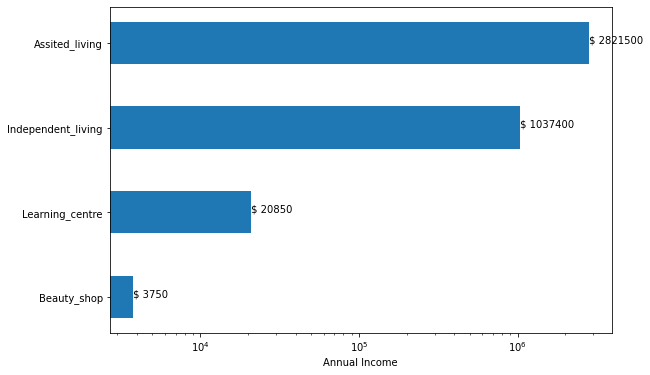

In [40]:
plt.figure(figsize=(9, 6))
plt.barh(income.Asset, income.Yearly_income, height=0.5, log=True)
plt.xlabel('Annual Income')
for i, v in enumerate(income.Yearly_income):
    plt.text(v + 10, i, '$ ' + str(int(v)))

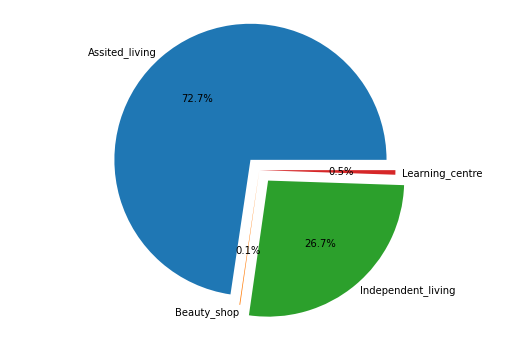

In [93]:
plt.figure(figsize=(9,6))
income_new = income.sort_values('Asset')
plt.pie(income_new.Yearly_income, labels=income_new.Asset, autopct='%1.1f%%', 
        labeldistance=1.05, explode=(0.1,0,0.1,0))
plt.axis('equal')
plt.show()

#### Use plotly, maybe easier for later dashboard

In [20]:
fig = go.Figure(data=[go.Bar(
            y=income.Asset, x=income.Yearly_income,
            text=income.Yearly_income,
            textposition='auto',
            orientation='h'
        )])
fig.update_layout(title='Annual Income')
fig.update_xaxes(title='Income')
fig.show()

In [29]:
fig = go.Figure(data=[go.Pie(labels=income.Asset, values=income.Yearly_income)])
fig.update_layout(title='Annual Income')
fig.show()